In [10]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
%autoreload
from utils import *
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

from hmmlearn import hmm
import time


# Simulation

In [12]:
data_state, state_sim = simulate_state(num_neuron=100, num_states=3, frequency=5, data_length=5000)

# Vizualization

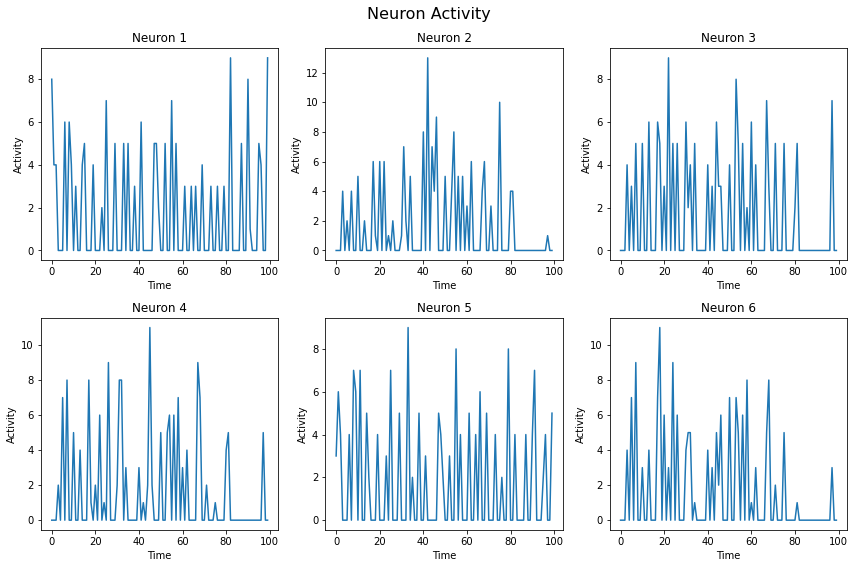

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Neuron Activity", fontsize=16)

t = 100 

data = data_state
i = 0
for cell in data.columns[0:6]:
    row, col = divmod(i,3)
    ax = axes[row, col]
    
    ax.plot(range(t), data[cell][0:t])
    ax.set_title(f"Neuron {i+1}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Activity")
    i += 1

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

# UMAP

In [15]:
X_scaled = StandardScaler().fit_transform(data_state)
reducer = umap.UMAP(n_neighbors=50, min_dist=1)

embedding = reducer.fit_transform(X_scaled)

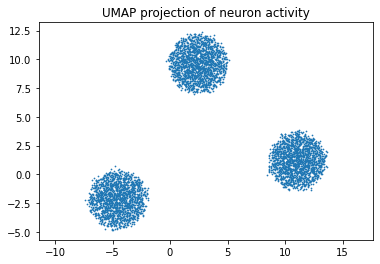

In [44]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], s = 0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of neuron activity');

# HMM

In [39]:
n_states = 3
X = data_state
n_retraining = 5

model_list = list()
score_list = list()
start_time = time.time()

for idx in range(n_retraining):
    model = hmm.PoissonHMM(n_components = n_states, verbose=True, random_state = idx, n_iter=10, tol = 500)
    try:
        model.fit(X)
    except:
        score_list.append(-np.inf)
        continue
    
    model_list.append(model)
    score_list.append(model.score(X))
    print(f'Converged: {model.monitor_.converged}\t\t'
              f'Score: {score_list[-1]}')
print("--- %s seconds ---" % (time.time() - start_time))

         1 -2330861.89732561             +nan
         2 -423635.45911572 +1907226.43820990
         3 -372769.49579135  +50865.96332437
         4 -372769.49579135      -0.00000000


Converged: True		Score: -372769.49579134973


         1 -2176598.85143500             +nan
         2 -589633.40737177 +1586965.44406323
         3 -372769.49579134 +216863.91158043
         4 -372769.49579135      -0.00000001


Converged: True		Score: -372769.4957913555


         1 -2327943.74130301             +nan
         2 -511413.77798697 +1816529.96331603
         3 -372769.49579136 +138644.28219562
         4 -372769.49579134      +0.00000001


Converged: True		Score: -372769.495791358


         1 -2490751.13773900             +nan
         2 -616845.93238428 +1873905.20535472
         3 -372769.49579136 +244076.43659292
         4 -372769.49579135      +0.00000001


Converged: True		Score: -372769.49579135084


         1 -2377244.53240234             +nan
         2 -782306.24949142 +1594938.28291092
         3 -735935.46790455  +46370.78158688
         4 -735915.63154997     +19.83635458


Converged: True		Score: -735907.9026852171
--- 7.382607698440552 seconds ---


In [40]:
score_list

[-372769.49579134973,
 -372769.4957913555,
 -372769.495791358,
 -372769.49579135084,
 -735907.9026852171]

In [41]:
model_sk = model_list[np.argmax(score_list)]
states_pred = model_sk.predict(X)

This time, we use predictions to color the UMAP

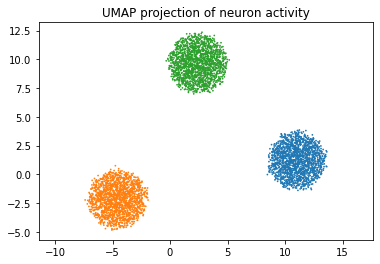

In [43]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=[sns.color_palette()[x] for x in states_pred], s = 0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of neuron activity');